In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import svd
from numpy.linalg import norm

## Predefined Plotting and Setup Functions

In [ ]:
# Plot 3D 
def plothouse3D(vals, title=None, xlabel=None, ylabel=None, color="black"):
  plt.figure()
  ax = plt.axes(projection='3d')
  xx = vals[:,0]
  yy = vals[:,1]
  zz = vals[:,2]

  # Bottom
  ax.plot3D([xx[1-1], xx[2-1]], [yy[1-1], yy[2-1]], [zz[1-1], zz[2-1]], color)
  ax.plot3D([xx[2-1], xx[3-1]], [yy[2-1], yy[3-1]], [zz[2-1], zz[3-1]], color)
  ax.plot3D([xx[3-1], xx[4-1]], [yy[3-1], yy[4-1]], [zz[3-1], zz[4-1]], color)
  ax.plot3D([xx[4-1], xx[1-1]], [yy[4-1], yy[1-1]], [zz[4-1], zz[1-1]], color)
  
  # Middle
  ax.plot3D([xx[1-1], xx[5-1]], [yy[1-1], yy[5-1]], [zz[1-1], zz[5-1]], color)
  ax.plot3D([xx[2-1], xx[6-1]], [yy[2-1], yy[6-1]], [zz[2-1], zz[6-1]], color)
  ax.plot3D([xx[3-1], xx[7-1]], [yy[3-1], yy[7-1]], [zz[3-1], zz[7-1]], color)
  ax.plot3D([xx[4-1], xx[8-1]], [yy[4-1], yy[8-1]], [zz[4-1], zz[8-1]], color)
  
  # Top
  ax.plot3D([xx[5-1], xx[6-1]], [yy[5-1], yy[6-1]], [zz[5-1], zz[6-1]], color)
  ax.plot3D([xx[6-1], xx[7-1]], [yy[6-1], yy[7-1]], [zz[6-1], zz[7-1]], color)
  ax.plot3D([xx[7-1], xx[8-1]], [yy[7-1], yy[8-1]], [zz[7-1], zz[8-1]], color)
  ax.plot3D([xx[8-1], xx[5-1]], [yy[8-1], yy[5-1]], [zz[8-1], zz[5-1]], color)

  # Tip
  ax.plot3D([xx[9-1],xx[5-1]],[yy[9-1],yy[5-1]],[zz[9-1],zz[5-1]],color)
  ax.plot3D([xx[9-1],xx[6-1]],[yy[9-1],yy[6-1]],[zz[9-1],zz[6-1]],color)
  ax.plot3D([xx[9-1],xx[7-1]],[yy[9-1],yy[7-1]],[zz[9-1],zz[7-1]],color)
  ax.plot3D([xx[9-1],xx[8-1]],[yy[9-1],yy[8-1]],[zz[9-1],zz[8-1]],color)

  if (title != None):
    plt.title(title)
  if (xlabel != None):
    plt.xlabel(xlabel)
  if (ylabel != None):
    plt.ylabel(ylabel)
  plt.show()

In [ ]:
# Plot 2D projection
def plothouse2D(pix, xend=None, yend=None, title=None, xlabel=None, ylabel=None, color="black"):
  plt.figure()
  xx = pix[:,0]
  yy = pix[:,1]

  # draw object as seen by camera
  # Bottom
  plt.plot([xx[1-1], xx[2-1]], [yy[1-1], yy[2-1]],color)
  plt.plot([xx[2-1], xx[3-1]], [yy[2-1], yy[3-1]],color)
  plt.plot([xx[3-1], xx[4-1]], [yy[3-1], yy[4-1]],color)
  plt.plot([xx[4-1], xx[1-1]], [yy[4-1], yy[1-1]],color)

  # Middle
  plt.plot([xx[1-1], xx[5-1]], [yy[1-1], yy[5-1]],color)
  plt.plot([xx[2-1], xx[6-1]], [yy[2-1], yy[6-1]],color)
  plt.plot([xx[3-1], xx[7-1]], [yy[3-1], yy[7-1]],color)
  plt.plot([xx[4-1], xx[8-1]], [yy[4-1], yy[8-1]],color)

  # Top
  plt.plot([xx[5-1], xx[6-1]], [yy[5-1], yy[6-1]],color)
  plt.plot([xx[6-1], xx[7-1]], [yy[6-1], yy[7-1]],color)
  plt.plot([xx[7-1], xx[8-1]], [yy[7-1], yy[8-1]],color)
  plt.plot([xx[8-1], xx[5-1]], [yy[8-1], yy[5-1]],color)

  # Tip
  plt.plot([xx[9-1],xx[5-1]],[yy[9-1],yy[5-1]],color)
  plt.plot([xx[9-1],xx[6-1]],[yy[9-1],yy[6-1]],color)
  plt.plot([xx[9-1],xx[7-1]],[yy[9-1],yy[7-1]],color)
  plt.plot([xx[9-1],xx[8-1]],[yy[9-1],yy[8-1]],color)

  if (title != None):
    plt.title(title)
  if (xlabel != None):
    plt.xlabel(xlabel)
  if (ylabel != None):
    plt.ylabel(ylabel)
  
  if (xend != None and yend != None):
   plt.xlim([0, xend])
   plt.ylim([0, yend])

  plt.show()

In [ ]:
# Camera Projection function from 3D to 2D
def cameraProjection(pts, K, Mextleft, Mextright):
  NN = 9
  leftpix = np.zeros((NN,3))
  rightpix = np.zeros((NN,3))
  for i in range(NN):
    pm = np.matrix([pts[i,0], pts[i,1], pts[i,2], 1])
    lpixels = np.matmul(np.matmul(K,Mextleft), pm.T)
    leftpix[i,:] = np.half((lpixels/lpixels[2]).T)
    rpixels = np.matmul(np.matmul(K,Mextright), pm.T)
    rightpix[i,:] = np.half((rpixels/rpixels[2]).T)

  return leftpix, rightpix

In [ ]:
# Converts projection epipolar lines into rays
def rayConverter(K, pix):
  ray = np.matmul(inv(K), pix.T)
  return ray

In [ ]:
def makeT(R,t):
  T = np.vstack((R.T,t)).T
  return T

def splitT(T):
  R = T[0:3,0:3]
  t = T[0:3,3]
  return R, t

## Example Setup

In [ ]:
# Input (House)
#pts2d = np.array([[0,0],[0,4],[2,6],[4,4],[4,0]])
pts = np.array([[2,0,0],[3,0,0],[3,1,0],[2,1,0],[2,0,1],[3,0,1],[3,1,1],[2,1,1],[2.5,0.5,2]])
print(pts)

[[2.  0.  0. ]
 [3.  0.  0. ]
 [3.  1.  0. ]
 [2.  1.  0. ]
 [2.  0.  1. ]
 [3.  0.  1. ]
 [3.  1.  1. ]
 [2.  1.  1. ]
 [2.5 0.5 2. ]]


In [ ]:
# intrinsic
K = np.array([[-1,0,2],[0,-1,2],[0,0,1]])

# Extrinsic Params (Rotation in Degrees)
zlrot = -10; zrrot = 30; # 0 0
ylrot = 60; yrrot = 40;  # 20 -20
xlrot = 90; xrrot = -90;   # 90 90
trcw = [0, 0, 5]
tlcw = [0, 0, 5]

def buildRmatrix(zrot = 0, yrot = 0, xrot = 0):
  zc = np.array([np.cos((zrot*np.pi)/180), np.sin((zrot*np.pi)/180)])
  yc = np.array([np.cos((yrot*np.pi)/180), np.sin((yrot*np.pi)/180)])
  xc = np.array([np.cos((xrot*np.pi)/180), np.sin((xrot*np.pi)/180)])
  zR = np.array([[zc[0],-1*zc[1],0],[zc[1],zc[0],0],[0,0,1]])
  yR = np.array([[yc[0],0,yc[1]],[0,1,0],[-1*yc[1],0,yc[0]]])
  xR = np.array([[1,0,0],[0,xc[0],-1*xc[1]],[0,xc[1],xc[0]]])
  R = np.matmul(zR,yR)
  R = np.matmul(R,xR)
  return R

def buildMmatrix(R, t):
  x = np.vstack((R.T,t)).T
  return x

Rl = buildRmatrix(zlrot,ylrot,xlrot)
Rr = buildRmatrix(zrrot,yrrot,xrrot)

Mextleft = buildMmatrix(Rl, tlcw)
Mextright = buildMmatrix(Rr, trcw)

print(K,"\n\n", Mextleft,"\n\n", Mextright)

[[-1  0  2]
 [ 0 -1  2]
 [ 0  0  1]] 

 [[ 4.92403877e-01  8.52868532e-01 -1.73648178e-01  0.00000000e+00]
 [-8.68240888e-02 -1.50383733e-01 -9.84807753e-01  0.00000000e+00]
 [-8.66025404e-01  5.00000000e-01  3.06161700e-17  5.00000000e+00]] 

 [[ 6.63413948e-01 -5.56670399e-01 -5.00000000e-01  0.00000000e+00]
 [ 3.83022222e-01 -3.21393805e-01  8.66025404e-01  0.00000000e+00]
 [-6.42787610e-01 -7.66044443e-01  4.69066938e-17  5.00000000e+00]]


In [ ]:
lpix, rpix = cameraProjection(pts, K, Mextleft, Mextright)

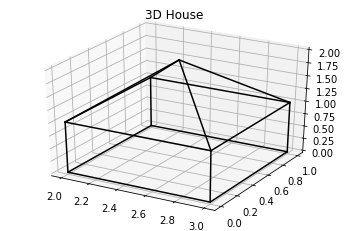

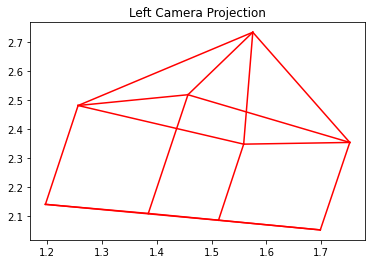

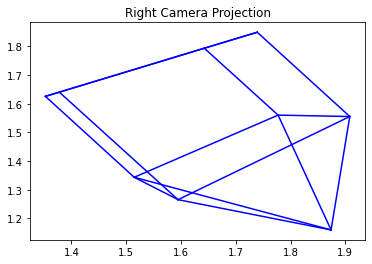

In [ ]:
plothouse3D(pts, "3D House")
plothouse2D(lpix, title="Left Camera Projection", color="red")
plothouse2D(rpix, title="Right Camera Projection", color="blue")

## Full Calibration

In [ ]:
# HELPER FUNCTIONS
# Trianglates 3D point using two rays 
# and the rotation and translation matricies of the right projection
def triangluate_dlt(pl,pr,Rlr,tlr):
  plt = pl
  prt = pr
  q = np.cross(plt, np.matmul(Rlr,prt))
  q = np.dot(q, 1/norm(q))
  Rlrptr = np.matmul((-1*Rlr),prt)
  A = np.vstack((plt, Rlrptr, q)).T
  solveit = np.matmul(inv(A),tlr)
  a = solveit[0]
  b = solveit[1]
  c = solveit[2]
  outpoint = np.dot(a,plt) + np.dot(c*0.5,q)
  return outpoint

# Reconstructs a 3D point given two rays
def reconstruct3d(leftray, rightray, Tlr, Twl):
  Rlr, tlr = splitT(Tlr)
  NN = leftray.shape[1]
  reconpts = np.zeros((NN,3))
  for i in range(NN):
    wrt_left = np.vstack(triangluate_dlt(leftray[:,i], rightray[:,i], Rlr, tlr))
    temp = np.matmul(Twl,np.vstack((wrt_left,[1])))
    three_d_point = np.dot(temp[0:3],1/temp[3])
    reconpts[i,:] = three_d_point
    #print(wrt_left)
  return reconpts

In [ ]:
# Returns 3D points when given K, right projection matrix, and left projection matrix
def calibratedStereoReconstruction(rproj, lproj, K, Mextright, Mextleft):
  leftray = rayConverter(K,lproj)
  rightray = rayConverter(K,rproj)
  Trw = np.vstack((Mextright, [0,0,0,1]))
  Tlw = np.vstack((Mextleft, [0,0,0,1]))
  Twr = inv(Trw)
  Twl = inv(Tlw)

  Tlr = np.matmul(Tlw, Twr)
  reconpts = reconstruct3d(leftray, rightray, Tlr,Twl)
  return reconpts

#print(Tlr)
#print(Rlr)
#print(tlr)

setofpts = calibratedStereoReconstruction(rpix, lpix, K, Mextright, Mextleft)
print(setofpts)

[[ 2.00060792e+00  8.52410349e-04 -1.24927223e-03]
 [ 2.99908369e+00  3.37368232e-03  1.33813749e-03]
 [ 3.00055341e+00  9.96187919e-01 -1.08929058e-03]
 [ 1.99818817e+00  1.00020995e+00 -1.66954884e-04]
 [ 1.99955258e+00 -1.31169886e-04  9.98644948e-01]
 [ 3.00006847e+00  1.74902348e-03  9.99028110e-01]
 [ 3.00014719e+00  1.00010861e+00  9.98811380e-01]
 [ 1.99986219e+00  9.98570061e-01  1.00036605e+00]
 [ 2.49899624e+00  5.01843059e-01  1.99894684e+00]]


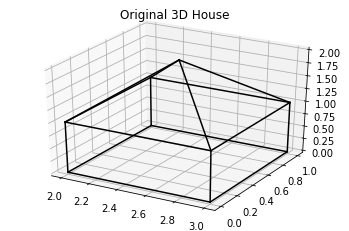

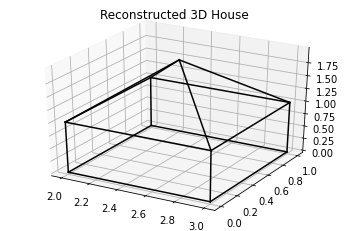

In [ ]:
plothouse3D(pts, title="Original 3D House")
plothouse3D(setofpts, title="Reconstructed 3D House")

In the full calibration case, the object's original rotation, position, and scale are recovered.

## Incomplete Calibration

In [ ]:
print(lpix,'\n',rpix)

[[1.69824219 2.05273438 1.        ]
 [1.38476562 2.109375   1.        ]
 [1.19726562 2.140625   1.        ]
 [1.51269531 2.0859375  1.        ]
 [1.75195312 2.35351562 1.        ]
 [1.45703125 2.51757812 1.        ]
 [1.25683594 2.48046875 1.        ]
 [1.55859375 2.34765625 1.        ]
 [1.57519531 2.73242188 1.        ]] 
 [[1.64257812 1.79394531 1.        ]
 [1.35253906 1.62597656 1.        ]
 [1.37792969 1.640625   1.        ]
 [1.73925781 1.84960938 1.        ]
 [1.77734375 1.56054688 1.        ]
 [1.51464844 1.34375    1.        ]
 [1.59472656 1.265625   1.        ]
 [1.90820312 1.55566406 1.        ]
 [1.87402344 1.16015625 1.        ]]


In [ ]:
def buildFmatrix(lpix, rpix):
  NN=9
  A = np.zeros((NN,NN))
  F = np.zeros((3,3))
  for i in range(NN):
    tt = np.multiply(np.vstack(lpix[i,:]), rpix[i,:])
    A[i,:] = np.hstack((tt[0,:],tt[1,:],tt[2,:]))

  [U,S,VH] = svd(A)
  V = VH.T.conj()
  k = 0
  nullspace = V[:,NN-1]
  for i in range(3):
    for j in range(3):
      F[i,j] = nullspace[k]
      k+=1
  return F

F = buildFmatrix(lpix, rpix)


In [ ]:
def getCameraMatrixfromF(F):
  NN = 3
  [U,S,VH] = svd(F.T)
  V = VH.T.conj()
  ep = V[:,NN-1] # epipole [x, y, z]
  ecross = np.array([[0, -ep[2], ep[1]],[ep[2], 0, -ep[0]],[-ep[1], ep[0], 0]]);
  cMR = np.matmul(ecross,F)
  cameraMatrix = np.vstack((cMR.T, ep)).T
  return cameraMatrix

cameramatrix = getCameraMatrixfromF(F)
print(cameramatrix)

[[-0.37991791 -0.28602858  0.76884444  0.31984672]
 [ 0.08993336  0.16864594 -0.32511947  0.86437597]
 [ 0.11283006 -0.1399142   0.09049515  0.38801063]]


In [ ]:
M4 = np.identity(4)
K2 = np.identity(3)

rray_noK = rayConverter(K2, rpix)
lray_noK = rayConverter(K2, lpix)

Fpts = reconstruct3d(lray_noK,rray_noK,cameramatrix,M4)
print(Fcalpts)

[[0.68303408 0.87569241 0.43160091]
 [0.63376095 0.98450295 0.48546243]
 [0.64663837 0.95596037 0.47165602]
 [0.68506172 0.87112463 0.42961264]
 [0.6602968  0.94416988 0.41706409]
 [0.60822897 1.06297452 0.4657465 ]
 [0.62606034 1.01887884 0.45645788]
 [0.66644784 0.92712738 0.41783625]
 [0.62263315 1.04359578 0.42320407]]


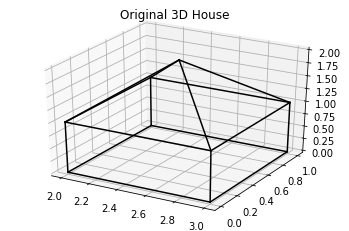

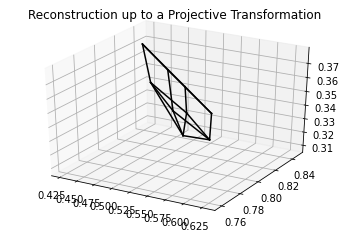

In [ ]:
plothouse3D(pts, title="Original 3D House")
plothouse3D(Fpts, title="Reconstruction up to a Projective Transformation")

For incomplete calibration, using only the Fundamental matrix, the reconstructed image has the correct connections between points, but has the incorrect scale, position, and rotation.


## Intrinsic Calibration

In [ ]:
# Reconstructs a 3D point given two rays (modified)
def reconstruct3d2(leftray, rightray, Tlr, Twl):
  Rlr, tlr = splitT(Tlr2)
  NN = leftray.shape[1]
  reconpts = np.zeros((NN,3))
  for i in range(NN):
    wrt_left = np.vstack(triangluate_dlt2(leftray[:,i], rightray[:,i], Rlr, tlr)).T
    temp = np.matmul(Twl,np.vstack((wrt_left,[1])))
    three_d_point = np.dot(temp[0:3],1/temp[3])
    reconpts[i,:] = three_d_point.T
  return reconpts

def triangluate_dlt2(pl,pr,Rlr,tlr):
  plt = pl
  prt = pr
  q = np.cross(plt, np.matmul(Rlr,prt))
  q = np.dot(q, 1/norm(q))
  Rlrptr = np.matmul((-1*Rlr),prt)
  A = np.vstack((plt, Rlrptr, q)).T
  solveit = np.matmul(inv(A),tlr)
  a = solveit[0]
  b = solveit[1]
  c = solveit[2]
  outpoint = a*plt + c*0.5*q
  return outpoint



In [ ]:
E = np.matmul(np.matmul(K.T,F),K)
#print(E)
W = np.matrix([[0,-1,0],[1,0,0],[0,0,1]])
Z = np.matrix([[0,1,0],[-1,0,0],[0,0,0]])
U, S, VH = svd(E)
V = VH.T.conj()
S1 = -1*np.matmul(np.matmul(U,Z),U.T)
S2 = np.matmul(np.matmul(U,Z),U.T)
R1 = np.matmul(np.matmul(U,W.T),V.T)
R2 = np.matmul(np.matmul(U,W),V.T)

print(R1)

[[ 9.45602507e-01  3.25324282e-01 -1.00670059e-04]
 [ 3.25323309e-01 -9.45600351e-01 -2.17265709e-03]
 [ 8.02011751e-04 -2.02171968e-03  9.99997635e-01]]


In [ ]:
# Create rays
rray = rayConverter(K, rpix)
lray = rayConverter(K, lpix)

foundit = 0

# case 1
if (not foundit):
  S = S1; R = R1
  tlr2 = np.hstack((S[2,1], S[0,2], -1*S[0,1])).T
  Tlr2 = makeT(R,tlr2)
  intpts = reconstruct3d2(lray,rray,Tlr2,np.identity(4))
  print(intpts[:,2])
  if (np.amin(intpts[:,2]) > 0):
    foundit = 1

print(foundit)

# case 2
if (not foundit):
  S = S2; R = R1
  tlr2 = np.hstack((S[2,1], S[0,2], -1*S[0,1])).T
  Tlr2 = makeT(R,tlr2)
  intpts = reconstruct3d2(lray,rray,Tlr2,np.identity(4))
  print(intpts[:,2])
  if (np.amin(intpts[:,2]) > 0):
    foundit = 1

print(foundit)

# case 3
if (not foundit):
  S = S1; R = R2
  tlr2 = np.hstack((S[2,1], S[0,2], -1*S[0,1])).T
  Tlr2 = makeT(R,tlr2)
  intpts = reconstruct3d2(lray,rray,Tlr2,np.identity(4))
  print(intpts[:,2])
  if (np.amin(intpts[:,2]) > 0):
    foundit = 1

print(foundit)

# case 4
if (not foundit):
  S = S2; R = R2
  tlr2 = np.hstack((S[2,1], S[0,2], -1*S[0,1])).T
  Tlr2 = makeT(R,tlr2)
  intpts = reconstruct3d2(lray,rray,Tlr2,np.identity(4))
  print(intpts[:,2])
  if (np.amin(intpts[:,2]) > 0):
    foundit = 1

print(foundit)

[-4.68687962 -2.29510686  3.06823974  2.9654089  -5.06867727 -2.59720431
  2.82230598  2.86348089 15.26280079]
0
[  4.68687962   2.29510686  -3.06823974  -2.9654089    5.06867727
   2.59720431  -2.82230598  -2.86348089 -15.26280079]
0
[0.50943131 0.37491778 0.45037551 0.5867072  0.51193463 0.37948987
 0.45665465 0.58873181 0.48459315]
1
1


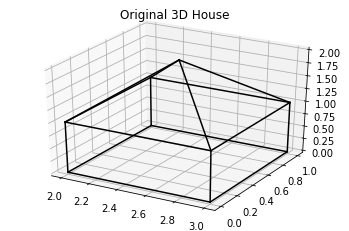

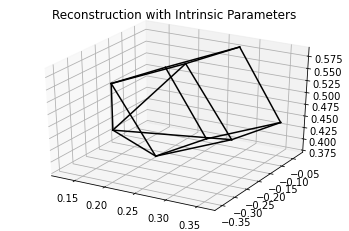

In [ ]:
plothouse3D(pts, title="Original 3D House")
plothouse3D(intpts, title="Reconstruction with Intrinsic Parameters")

Basing reconstruction using the essential matrix and intrinisic properties leads to a reconstruction that has the correct relative positioning of points in the 3D space. It has the incorrect rotation and position due to the lack of projective matricies.